Compute the time evolution of a 2 ion system contructed to simulate electron transfer. @author: zhumj

Reproduce the result in Schlawin et. al. PRXQuantum Paper:
https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.2.010314


In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import Qsim.operator.spin as spin
import Qsim.operator.phonon as phon
import Qsim.ion_chain.transfer.elec_transfer as etrans
from  Qsim.ion_chain.ion_system import *
import Qsim.operator.spin_phonon as sp_op
import Qsim.ion_chain.interaction.dissipation as disp
import Qsim.ion_chain.interaction.spin_phonon as sp_ph

plt.rcParams['figure.dpi']= 200

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [362]:
#%%
'''
parameters of the system, use the same parameter in quantum regime 
'''    
delta = 10 #detuning from com mode
ion_sys = ions(trap_config = {'N':2,'fx':3.2,'fz':1.0}) #construct a two ion system using class ions
ion_sys.coolant = [1] #ion 2 as coolant
ion_sys.active_phonon = [[0,1]] #consider only com mode
ion_sys.active_spin = [0]
ion_sys.pcut = [[3,20]]
ion_sys.update_all(print_text = True)
ion_sys.list_para() #print parameters of the system

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
________________________________________________________________
********************Setup of the Trap************************
number of ions 2
Axial COM (Confining) frequency  1.0  [MHz]
Radial COM (Confining) frequency  3.2 [MHz]
Axial vibrational eigenfrequency [1.   1.73] MHz
Radial (Tr

In [354]:
print(ion_sys.radial_freq[0])

ion_sys.radial_freq[1]

3.2


3.039736830714133

In [363]:
laser1 = Laser()
laser1.Omega_eff = 10
laser1.wavevector = 1 
laser1.laser_couple = [0]
laser1.phase = np.pi/2 #to get sigma_y
laser1.mu = 1e3*ion_sys.radial_freq[1]-delta
laser1.list_para()

Laser parameters updated
Lasers class object initialized.
                                                                 
********************Parameters of Laser Drive************************
Vibrational degree of freedom couples to the laser: Transverse (Radial x)
index of ions that couple to the laser field:  [0]
Effective rabi frequency  10  [kHz]
Effective laser frequency  3029.74  [kHz]
Laser phase phis 90.0
(input in rad but displayed in degs)


In [377]:
omegax = 0.01*np.abs(delta)*0
omegay = 0.01*np.abs(delta)*0
deltaE = 1*np.abs(delta)*1  #note site energy difference is negative by definition 
n0=2
df_p = 1 #for phonon measurements
'''
simulation with 1 mode, reproduce curve C in Fig 3(B)
'''
elist = [sp_op.spin_measure(ion_sys,[0,1]),
         sp_op.phonon_measure(ion_sys,df_p, mindex=1)#tilt mode population
]

########################
#solve time evolution
H0  = etrans.H_res(ion_sys,laser1, Omegax=omegax,Omegay=omegay,Omegaz=deltaE,i_type=1)#i_type=0->zz, i_type=1->laser phase (0 for x, pi/2 for y)
clist1 = disp.cooling(ion_sys,gamma_list = [0,0],nbar_list = [0.5,0.5],df=1, normalized = False)
rho0 = sp_op.rho_thermal(ion_sys, nbar_list=[[n0,n0]],s_state=[1],ket = False)
tplot = np.arange(0,2,0.001)
#times = tplot*2*np.pi/(2*np.pi*np.abs(delta))
times = tplot

print("solving time evolution (2 modes, gamma=0) for deltaE =", deltaE)
result = mesolve(H0,rho0,times,clist1,elist,progress_bar=True,options=Options(nsteps=100000))

#####################
#solve time evolution for second set of parameters (different initial temperature, adding gamma, etc.)
gamma=0.15*np.abs(delta)/(2*np.pi)*0
clist1 = disp.cooling(ion_sys,gamma_list = [0,gamma],nbar_list = [0.5,0.5],df=1, normalized = False)
rho0 = sp_op.rho_thermal(ion_sys, nbar_list=[[0.1,0.1]],s_state=[1],ket = False)

print("solving time evolution (2 modes with gamma) for deltaE =", deltaE)
result1 = mesolve(H0,rho0,times,clist1,elist,progress_bar=True,options=Options(nsteps=100000))

solving time evolution (2 modes, gamma=0) for deltaE = 10
10.0%. Run time:   0.67s. Est. time left: 00:00:00:05
20.0%. Run time:   1.41s. Est. time left: 00:00:00:05
30.0%. Run time:   2.18s. Est. time left: 00:00:00:05
40.0%. Run time:   3.02s. Est. time left: 00:00:00:04
50.0%. Run time:   4.20s. Est. time left: 00:00:00:04
60.0%. Run time:   5.38s. Est. time left: 00:00:00:03
70.0%. Run time:   6.55s. Est. time left: 00:00:00:02
80.0%. Run time:   7.72s. Est. time left: 00:00:00:01
90.0%. Run time:   8.90s. Est. time left: 00:00:00:00
Total run time:  10.07s
solving time evolution (2 modes with gamma) for deltaE = 10
10.0%. Run time:   0.85s. Est. time left: 00:00:00:07
20.0%. Run time:   1.76s. Est. time left: 00:00:00:07
30.0%. Run time:   2.66s. Est. time left: 00:00:00:06
40.0%. Run time:   3.55s. Est. time left: 00:00:00:05
50.0%. Run time:   4.45s. Est. time left: 00:00:00:04
60.0%. Run time:   5.32s. Est. time left: 00:00:00:03
70.0%. Run time:   6.20s. Est. time left: 00:00:

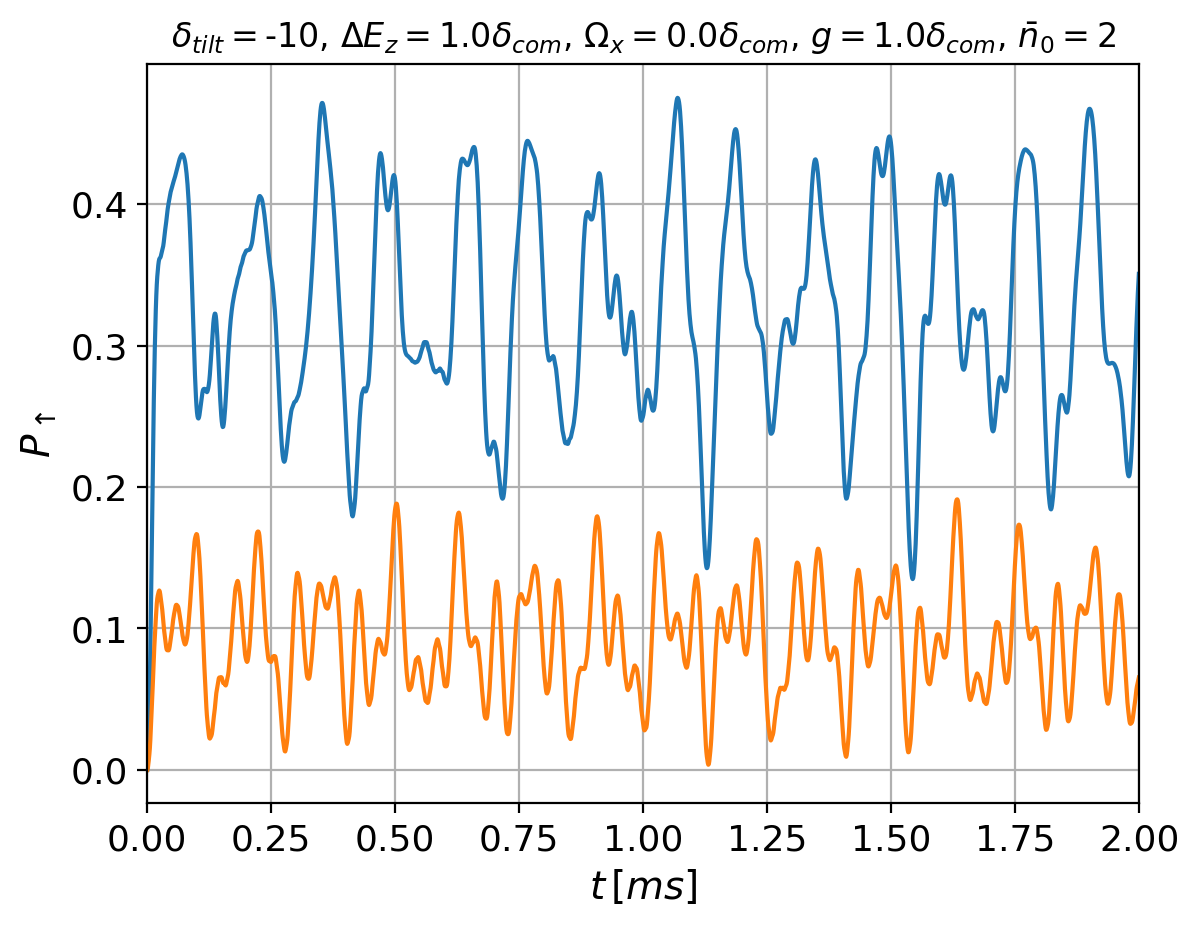

In [378]:
#%%
#extract ground state population
rhoee1 = result.expect[0]
rhoee1g = result1.expect[0]

fig = plt.figure()
plt.clf()
plt.plot(tplot,rhoee1)
plt.plot(tplot,rhoee1g)
title = r'$\delta_{tilt} = $' + str(-delta)+r', $\Delta E_z = $' + str(deltaE/delta)+r'$\delta_{com}$, $\Omega_x = $' + str(omegax/delta)+r'$\delta_{com}$, $g = $'+ str(laser1.Omega_eff/delta)+r'$\delta_{com}$, $\bar{n}_0 = $'+str(n0)
plt.xlabel(r'$t\,[ms]$',fontsize = 14)
plt.ylabel(r'$P_{\uparrow}$',fontsize = 14)
plt.title(title)
plt.grid() 
plt.xlim(0,2)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.show()

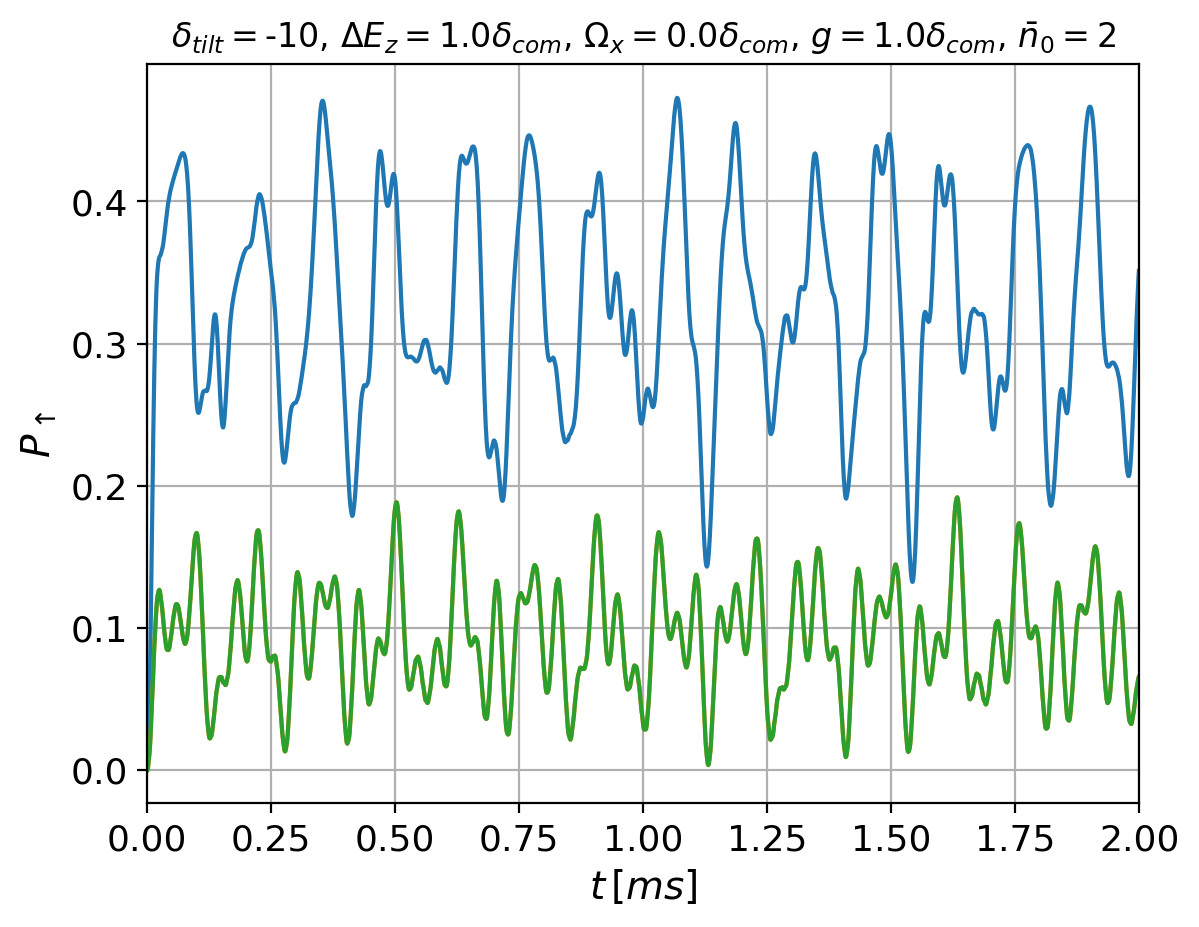

In [359]:
fig.gca().plot(tplot,rhoee1g)
fig

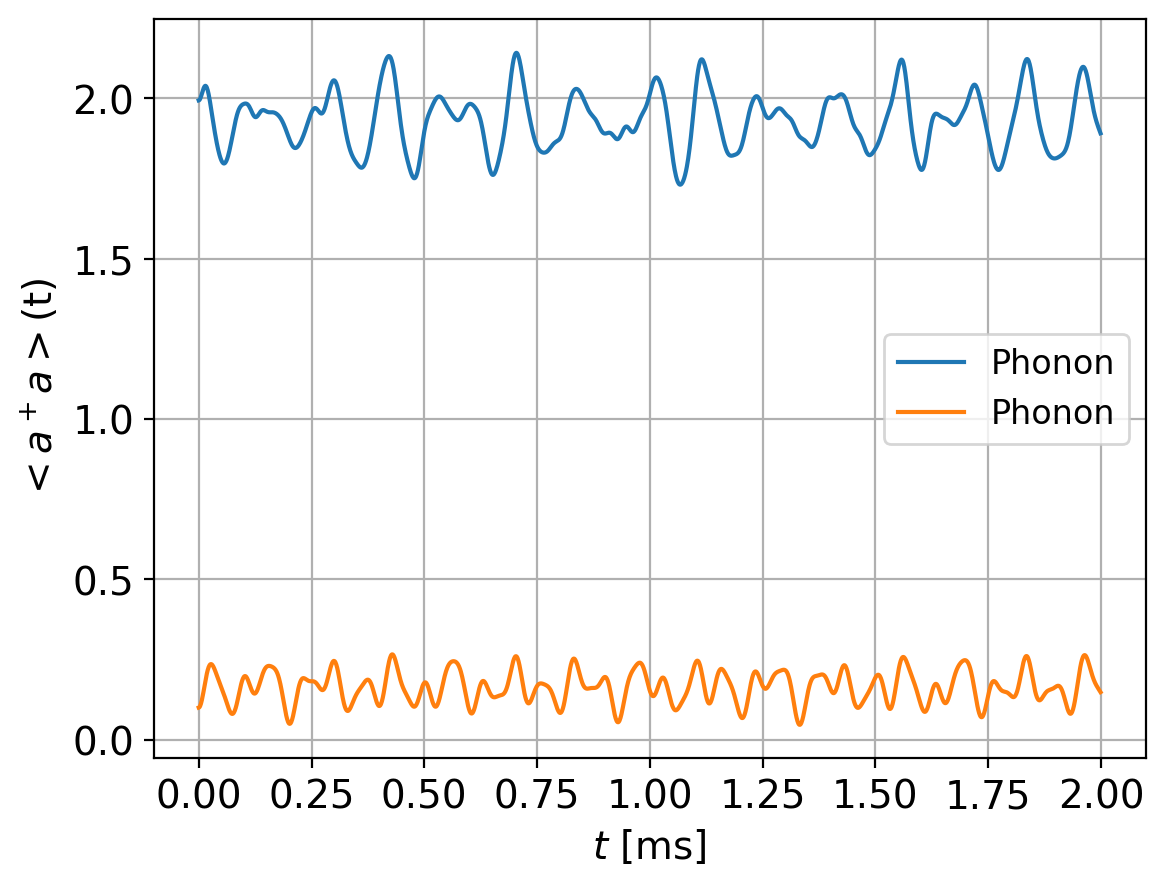

In [376]:
pplot = result.expect[1]
pplot1 = result1.expect[1]
plt.plot(times,pplot,label = 'Phonon')
plt.plot(times,pplot1,label = 'Phonon')
plt.xlabel(r'$t$ [ms]',fontsize = 14)
#title = r'$\delta_{com} = $'+str(ion_sys.delta)+' kHz'
plt.ylabel(r'$<a^+ a>$(t)',fontsize = 14)
#plt.title(title,fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.grid()
plt.show()

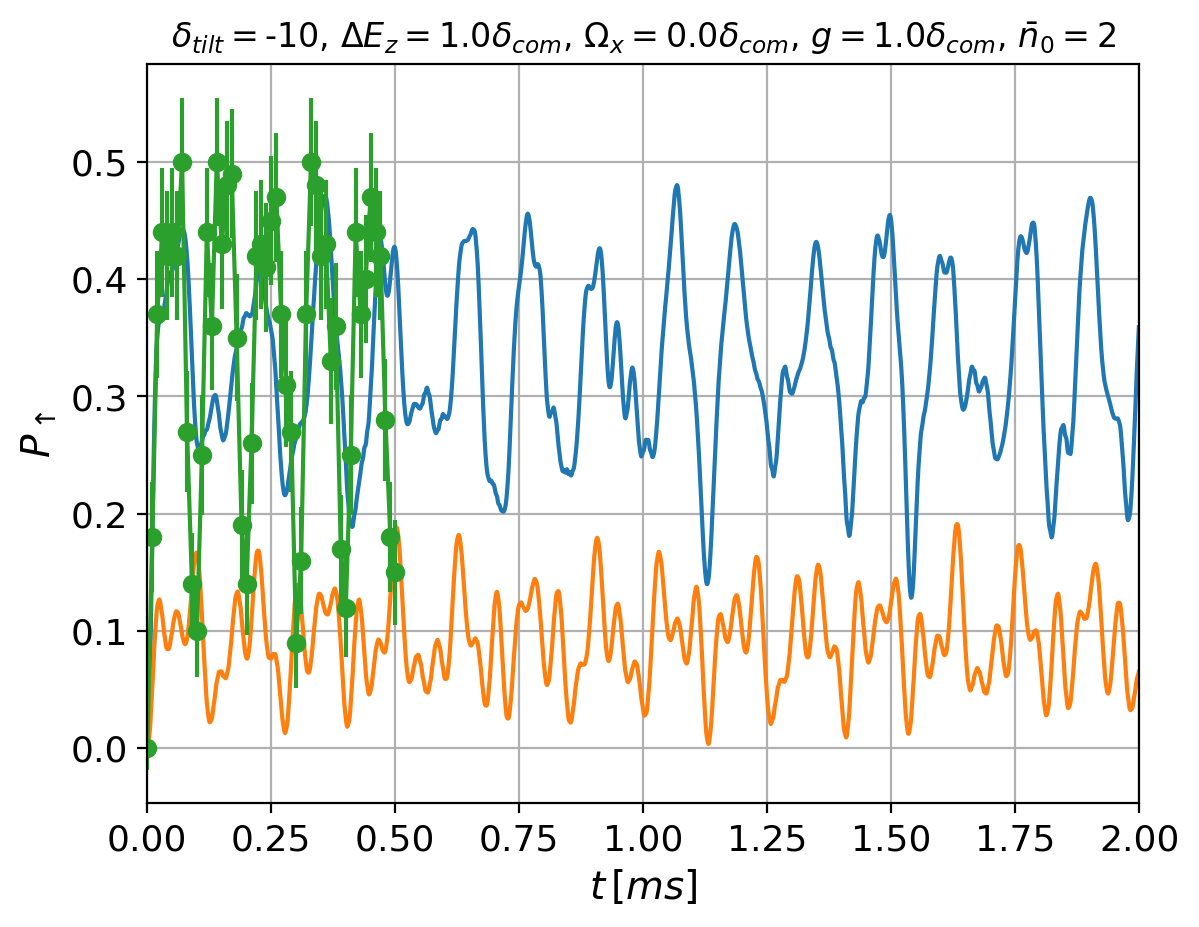

In [351]:
filename="RamanRabiScanAWG_015"
data=np.loadtxt(filename, dtype=float, comments='#')
x=data[:,2];y=data[:,3];error=data[:,6]
#print(erry)
fig.gca().errorbar(x, y, yerr=error,fmt='-o')
fig

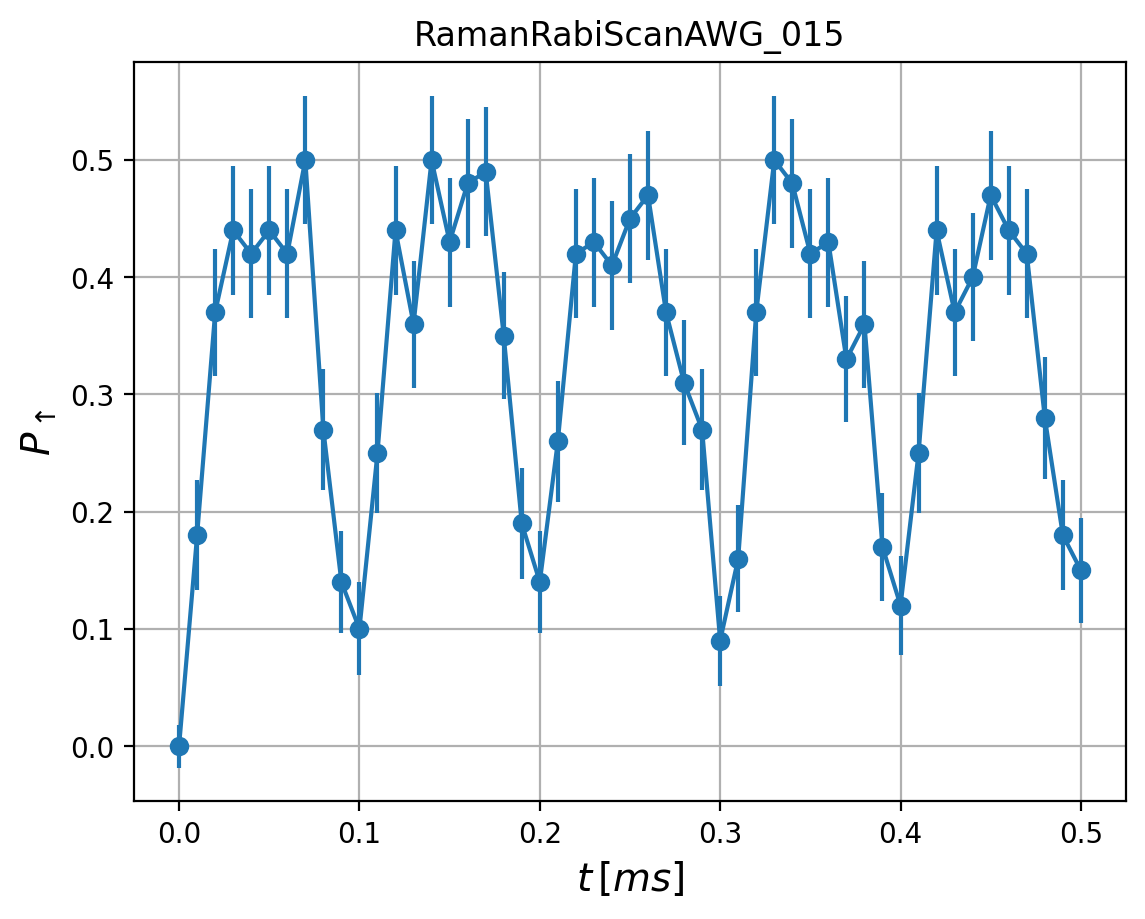

In [272]:
fig1 = plt.figure()
#plt.clf()
plt.errorbar(x, y, yerr=error,fmt='-o')
title = str(filename)
plt.xlabel(r'$t\,[ms]$',fontsize = 14)
plt.ylabel(r'$P_{\uparrow}$',fontsize = 14)
plt.title(title)
plt.grid() 
plt.show()

[0.18096748 0.10976233 0.06657422 0.0403793  0.02449129 0.01485472
 0.00900984 0.00546474]


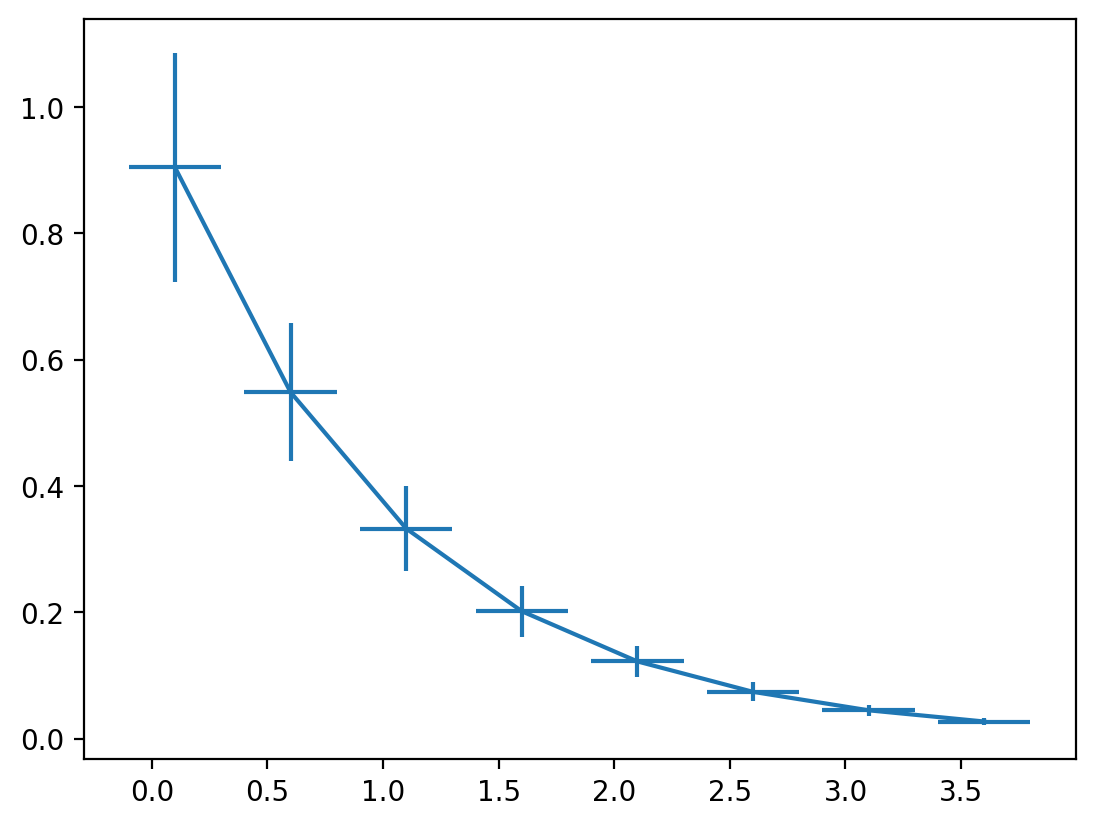

In [150]:
# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
erry=0.2*y
print(erry)
fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=0.2, yerr=erry)
plt.show()


In [78]:
a[2][0]=='#'

True

In [81]:
for i in range(len(a)-1):
    if a[i][0]=='#':
        a.remove(a[i])

IndexError: list index out of range

In [83]:
a

['#     <Element name="PulseProgram" type="dict">\n',
 '#       <Element name="INTERRUPT_EXITCODE" type="Quantity">18446198715942174720</Element>\n',
 '#       <Element name="AWGExpOn_mask" type="int">9127397379</Element>\n',
 '#       <Element name="PumpingOn_mask" type="int">603980288</Element>\n',
 '#       <Element name="DetectOn_mask" type="int">33554696</Element>\n',
 '#       <Element name="RamanOn_mask" type="int">8590002176</Element>\n',
 '#       <Element name="Exp435On_mask" type="int">16777216</Element>\n',
 '#       <Element name="Det935off_mask" type="int">536870912</Element>\n',
 '#       <Element name="StatePrep435_mask" type="int">553648128</Element>\n',
 '#       <Element name="MicrowaveFreq" type="Quantity">142.8194455656 MHz</Element>\n',
 '#       <Element name="IndividualOPFreq3" type="int">0</Element>\n',
 '#       <Element name="DetectionFreq" type="Quantity">225.0 MHz</Element>\n',
 '#       <Element name="RamanStatePrepFreq" type="Quantity">213.95143514 MHz</E

In [31]:


print(type(f))
for line in f:
    print(line)

<class '_io.TextIOWrapper'>
